<a href="https://colab.research.google.com/github/Charles-OBert/Data-Science-Project/blob/main/Rats_in_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




**Rats in NYC**

Charles O'Bert and Cameron

[Website Link]




**Project Goals**

The goal of this project is to understand the rat infestation issue in New York City. Several questions we want to answer:



*   What areas of New York City are most affected by the rats?
*   What factors cause certain areas of New York City to have a higher density in rats?
*   Are there any factors that are human-related?

So far, we’ve come up with only one data set that shows the geographic distribution of rats in New York City, but we are still on the lookout.

**Collaboration Plan**

Our plan is to meet biweekly over Zoom in order to break down the deliverables for each milestone. We will go through each piece of the assignment and work on some pieces collaboratively and delegate other pieces accordingly. We plan to use Google Colab for the coding bits, and then we will import it into Jupyter Notebooks in order to submit it.

**Data Set Description:**

https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe/about_data

New York City Services gives documentation for each service call they received from 2010 to present including when the complaint was opened and closed, where it came from and other other descriptive variables.

In [ ]:
#ETL: get and turn into tidy data
import pandas as pd
!git clone https://github.com/Charles-OBert/Data-Science-Project.git
rats = pd.read_csv('Data-Science-Project/Rat_Sightings.csv') # read the 'csv' file
rats.head()

fatal: destination path 'Data-Science-Project' already exists and is not an empty directory.


<ipython-input-31-d65a12816c25>:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  rats = pd.read_csv('Data-Science-Project/Rat_Sightings.csv') # read the 'csv' file


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,43601221,08/21/2019 03:19:40 PM,09/05/2019 12:13:56 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11379.0,66-08 73 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714803,-73.880961,"(40.7148032048583, -73.88096061491734)"
1,43514079,08/11/2019 12:44:47 AM,10/03/2019 04:21:04 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11232.0,4201 THIRD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.652075,-74.010008,"(40.65207491193432, -74.01000792293357)"
2,43487445,08/07/2019 12:48:56 PM,08/29/2019 12:04:12 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11214.0,1846 BATH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.603169,-74.004826,"(40.603168585850305, -74.00482563675014)"
3,43527756,08/12/2019 03:12:52 AM,08/29/2019 12:08:43 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Hospital,10037.0,37 WEST 137 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.814592,-73.937963,"(40.81459196358481, -73.9379633682187)"
4,43560214,08/16/2019 04:48:29 PM,09/05/2019 12:13:57 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11379.0,61-33 82 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725040,-73.876974,"(40.72503971978735, -73.8769737384869)"


Let's get rid of columns we don't need or are not functional.

In [ ]:
rats = rats.drop(rats.nunique()[rats.nunique() <= 1].index, axis=1) #Gets rid of columns with nothing or only one value
rats = rats.drop(["Due Date",
                  "Address Type",
                  "Park Borough",
                  "Location",
                  "Community Board",
                  "Created Date",
                  "Closed Date",
                  "Resolution Action Updated Date",
                  "X Coordinate (State Plane)",
                  "Y Coordinate (State Plane)",
                  "Unique Key",
                  "Intersection Street 1",
                  "Intersection Street 2",
                  "Incident Zip",
                  "Status"], axis =1)
rats=rats.dropna()
rats.head()

,Location Type,Incident Address,Street Name,Cross Street 1,Cross Street 2,City,Landmark,Borough,Latitude,Longitude
0,1-2 Family Dwelling,66-08 73 PLACE,73 PLACE,JUNIPER VALLEY ROAD,66 ROAD,MIDDLE VILLAGE,73 PLACE,QUEENS,40.714803,-73.880961
1,Commercial Building,4201 THIRD AVENUE,THIRD AVENUE,42 STREET,43 STREET,BROOKLYN,3 AVENUE,BROOKLYN,40.652075,-74.010008
2,Commercial Building,1846 BATH AVENUE,BATH AVENUE,BAY 19 STREET,BAY 20 STREET,BROOKLYN,BATH AVENUE,BROOKLYN,40.603169,-74.004826
3,Hospital,37 WEST 137 STREET,WEST 137 STREET,5 AVENUE,LENOX AVENUE,NEW YORK,WEST 137 STREET,MANHATTAN,40.814592,-73.937963
4,1-2 Family Dwelling,61-33 82 STREET,82 STREET,CALDWELL AVENUE,62 AVENUE,MIDDLE VILLAGE,82 STREET,QUEENS,40.725040,-73.876974


Now we check for their data types. All of the data types match what was expected, so we are all set in that regard.


In [ ]:
rats.dtypes

Location Type        object
Incident Address     object
Street Name          object
Cross Street 1       object
Cross Street 2       object
City                 object
Landmark             object
Borough              object
Latitude            float64
Longitude           float64
dtype: object

Now that our data frame is tidy, let's figure out which area has the highest amount of rat sightings.

In [ ]:
borough_counts = rats.Borough.value_counts()
borough_counts

BROOKLYN         38113
MANHATTAN        25998
BRONX            16274
QUEENS           15359
STATEN ISLAND     3010
Name: Borough, dtype: int64

<Axes: >

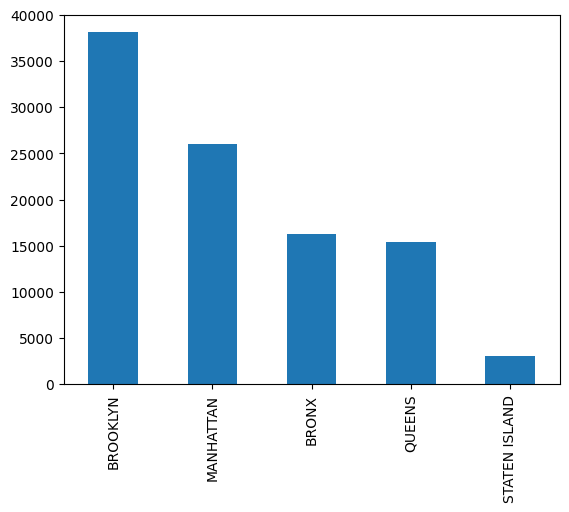

In [ ]:
#Visualization
borough_counts = rats.Borough.value_counts()
borough_counts.plot.bar()

In [255]:
%%shell

jupyter nbconvert --to html 'Rats_in_NYC.ipynb'

[NbConvertApp] WARNING | pattern 'Rats_in_NYC.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   

CalledProcessError: Command '
jupyter nbconvert --to html 'Rats_in_NYC.ipynb'
' returned non-zero exit status 255.